# Task 3 - Modeling
## Section 1 - Setup

In [48]:
import pandas as pd

---

## Section 2 - Data loading


In [49]:
path = "data/"

sales_df = pd.read_csv(f"{path}sales.csv")
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [50]:
stock_df = pd.read_csv(f"{path}sensor_stock_levels.csv")
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [51]:
temp_df = pd.read_csv(f"{path}sensor_storage_temperature.csv")
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


---
## Section 3: Clean the data

In [52]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   15000 non-null  object 
 1   timestamp            15000 non-null  object 
 2   product_id           15000 non-null  object 
 3   estimated_stock_pct  15000 non-null  float64
dtypes: float64(1), object(3)
memory usage: 468.9+ KB


In [53]:
stock_df.describe()

,estimated_stock_pct
count,15000.000000
mean,0.502735
std,0.286842
min,0.010000
25%,0.260000
50%,0.500000
75%,0.750000
max,1.000000


In [54]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


In [55]:
sales_df.describe()

,unit_price,quantity,total
count,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905
std,5.388088,1.122722,17.446680
min,0.190000,1.000000,0.190000
25%,3.990000,1.000000,6.570000
50%,7.190000,3.000000,14.970000
75%,11.190000,4.000000,28.470000
max,23.990000,4.000000,95.960000


In [56]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           23890 non-null  object 
 1   timestamp    23890 non-null  object 
 2   temperature  23890 non-null  float64
dtypes: float64(1), object(2)
memory usage: 560.0+ KB


In [57]:
temp_df.describe()

,temperature
count,23890.000000
mean,-0.207075
std,11.217649
min,-30.990000
25%,-2.860000
50%,-1.000000
75%,1.840000
max,34.990000


Everything looks fine apart from `timestamp` having the wrong data type.

In [58]:
for df in [stock_df,temp_df,sales_df]:
    df['timestamp'] = pd.to_datetime(df['timestamp'])

stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   15000 non-null  object        
 1   timestamp            15000 non-null  datetime64[ns]
 2   product_id           15000 non-null  object        
 3   estimated_stock_pct  15000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 468.9+ KB


In [59]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 550.6+ KB


In [60]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.0+ KB


---
### Section 4: Merge the data

The only common column between all the dataframes is `timestamp`. Since the client wants to predict stock levels on hourly basis we will transform the `timestamp` column to be based on the hour of the day. 

In [61]:
from datetime import datetime

def convert_timestamp_to_hourly(data: pd.DataFrame = None):
  dummy = data.copy()
  new_ts = dummy['timestamp'].tolist()
  new_ts = [i.strftime('%Y-%m-%d %H:00:00') for i in new_ts]
  new_ts = [datetime.strptime(i, '%Y-%m-%d %H:00:00') for i in new_ts]
  dummy['timestamp'] = new_ts
  return dummy

In [62]:
stock_df = convert_timestamp_to_hourly(stock_df)
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [63]:
temp_df = convert_timestamp_to_hourly(temp_df)
temp_df.head()

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:00:00,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:00:00,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:00:00,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:00:00,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:00:00,1.38


In [64]:
sales_df = convert_timestamp_to_hourly(sales_df)
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


For the `sales` data, we want to group the data by `timestamp` but also by `product_id`. When we aggregate, we must choose which columns to aggregate by the grouping. For now, let's aggregate quantity.

In [70]:
sales_agg = sales_df.groupby(['timestamp', 'product_id']).agg({'quantity': 'sum','unit_price':'mean'}).reset_index()
sales_agg.head()

,timestamp,product_id,quantity,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,3,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,3,1.49
2,2022-03-01 09:00:00,03a2557a-aa12-4add-a6d4-77dc36342067,3,5.99
3,2022-03-01 09:00:00,049b2171-0eeb-4a3e-bf98-0c290c7821da,7,2.49
4,2022-03-01 09:00:00,04da844d-8dba-4470-9119-e534d52a03a0,11,0.49


For the stock data, we want to group it in the same way and aggregate the `estimated_stock_pct`.

In [73]:
stock_agg = stock_df.groupby(['timestamp','product_id']).agg({'estimated_stock_pct':'mean'}).reset_index()
stock_agg.head()

,timestamp,product_id,estimated_stock_pct
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05


For temperature data we will group by `timestamp`.

In [75]:
temp_agg = temp_df.groupby('timestamp').agg({'temperature':'mean'}).reset_index()
temp_agg.head()

,timestamp,temperature
0,2022-03-01 09:00:00,-0.028850
1,2022-03-01 10:00:00,1.284314
2,2022-03-01 11:00:00,-0.560000
3,2022-03-01 12:00:00,-0.537721
4,2022-03-01 13:00:00,-0.188734


We are ready to merge our data.

In [86]:
merge_df = stock_agg.merge(sales_agg,on=['timestamp','product_id'],how='left')
merge_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,unit_price
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,11.19
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,1.49
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,NaN
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,NaN
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,NaN


In [87]:
merge_df = merge_df.merge(temp_agg,on='timestamp',how='left')
merge_df.head()

,timestamp,product_id,estimated_stock_pct,quantity,unit_price,temperature
0,2022-03-01 09:00:00,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,11.19,-0.02885
1,2022-03-01 09:00:00,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,1.49,-0.02885
2,2022-03-01 09:00:00,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,NaN,NaN,-0.02885
3,2022-03-01 09:00:00,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,NaN,NaN,-0.02885
4,2022-03-01 09:00:00,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,NaN,NaN,-0.02885


In [88]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             3067 non-null   float64       
 4   unit_price           3067 non-null   float64       
 5   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 593.1+ KB


We will take of the null values by filling them with zero.

In [90]:
merge_df = merge_df.fillna(0)
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   unit_price           10845 non-null  float64       
 5   temperature          10845 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 593.1+ KB


We can add the rest of features like `category`

In [96]:
product_cat = sales_df[['product_id','category']].drop_duplicates()
merge_df = merge_df.merge(product_cat,on='product_id',how='left')
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   timestamp            10845 non-null  datetime64[ns]
 1   product_id           10845 non-null  object        
 2   estimated_stock_pct  10845 non-null  float64       
 3   quantity             10845 non-null  float64       
 4   unit_price           10845 non-null  float64       
 5   temperature          10845 non-null  float64       
 6   category             10845 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 677.8+ KB


---
### Section 5: Feature Engineering

First we will create an hour, days column from the `timestamp` column.


In [102]:
merge_df['hour'] = merge_df['timestamp'].dt.hour
merge_df['day_of_month'] = merge_df['timestamp'].dt.day
merge_df['day_of_week'] = merge_df['timestamp'].dt.day_of_week
merge_df.drop(columns=['timestamp'], inplace=True)
merge_df.head()

,product_id,estimated_stock_pct,quantity,unit_price,temperature,category,hour,day_of_month,day_of_week
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,11.19,-0.02885,kitchen,9,1,1
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,1.49,-0.02885,vegetables,9,1,1
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,0.00,-0.02885,baby products,9,1,1
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,0.00,-0.02885,beverages,9,1,1
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,0.00,-0.02885,pets,9,1,1


Second we will one-hot encode the category variables.

In [105]:
merge_df = pd.get_dummies(merge_df,columns=['category'])
merge_df.head()

,product_id,estimated_stock_pct,quantity,unit_price,temperature,hour,day_of_month,day_of_week,category_baby products,category_baked goods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,00e120bb-89d6-4df5-bc48-a051148e3d03,0.89,3.0,11.19,-0.02885,9,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,01f3cdd9-8e9e-4dff-9b5c-69698a0388d0,0.14,3.0,1.49,-0.02885,9,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,01ff0803-ae73-4234-971d-5713c97b7f4b,0.67,0.0,0.00,-0.02885,9,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0363eb21-8c74-47e1-a216-c37e565e5ceb,0.82,0.0,0.00,-0.02885,9,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03f0b20e-3b5b-444f-bc39-cdfa2523d4bc,0.05,0.0,0.00,-0.02885,9,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0


We can go ahead and remove the `product_id` column.

In [106]:
merge_df.drop(columns=['product_id'], inplace=True)
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10845 entries, 0 to 10844
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   estimated_stock_pct             10845 non-null  float64
 1   quantity                        10845 non-null  float64
 2   unit_price                      10845 non-null  float64
 3   temperature                     10845 non-null  float64
 4   hour                            10845 non-null  int64  
 5   day_of_month                    10845 non-null  int64  
 6   day_of_week                     10845 non-null  int64  
 7   category_baby products          10845 non-null  uint8  
 8   category_baked goods            10845 non-null  uint8  
 9   category_baking                 10845 non-null  uint8  
 10  category_beverages              10845 non-null  uint8  
 11  category_canned foods           10845 non-null  uint8  
 12  category_cheese                 

---
## Section 7 : Modelling

Now it is time to train a machine learning model. We will use a supervised machine learning model, and we will use `estimated_stock_pct` as the target variable, since the problem statement was focused on being able to predict the stock levels of products on an hourly basis.

Whilst training the machine learning model, we will use cross-validation, which is a technique where we hold back a portion of the dataset for testing in order to compute how well the trained machine learning model is able to predict the target variable.

Finally, to ensure that the trained machine learning model is able to perform robustly, we will want to test it several times on random samples of data, not just once. Hence, we will use a `K-fold` strategy to train the machine learning model on `K` (K is an integer to be decided) random samples of the data.

In [118]:
X = merge_df.drop(columns=['estimated_stock_pct'])
y = merge_df['estimated_stock_pct']
K = 10
split = 0.75
print(X.shape)
print(y.shape)

(10845, 28)
(10845,)


For our model we will start with a simple Linear Regression model to see how it performs. To measure performance we will Mean Absolute Error (MAE). We will also scale our data to help the model to converge.

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

In [134]:
def modeler(Model,modelname,X,y,params=None):
    '''
    Creates a model and tests in k-fold fashion. For each fold the accuracy is recorded and 
    '''
    accuracy = []

    for fold in range(0, K):

        # Instantiate algorithm
        if params:
            model = Model(**params)
        else:
            model = Model()
        scaler = StandardScaler()

        # Create training and test samples
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split, random_state=42)

        # Scale X data, we scale the data because it helps the algorithm to converge
        # and helps the algorithm to not be greedy with large values
        scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        # Train model
        trained_model = model.fit(X_train, y_train)

        # Generate predictions on test sample
        y_pred = trained_model.predict(X_test)

        # Compute accuracy, using mean absolute error
        mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
        accuracy.append(mae)
        print(f"{modelname}: Fold {fold + 1}: MAE = {mae:.3f}")

    print(f"Average MAE for {modelname}: {(sum(accuracy) / len(accuracy)):.2f}")
    return model


In [135]:
lin_model = modeler(LinearRegression,'LinearModel',X,y)

LinearModel: Fold 1: MAE = 0.222
LinearModel: Fold 2: MAE = 0.222
LinearModel: Fold 3: MAE = 0.222
LinearModel: Fold 4: MAE = 0.222
LinearModel: Fold 5: MAE = 0.222
LinearModel: Fold 6: MAE = 0.222
LinearModel: Fold 7: MAE = 0.222
LinearModel: Fold 8: MAE = 0.222
LinearModel: Fold 9: MAE = 0.222
LinearModel: Fold 10: MAE = 0.222
Average MAE for LinearModel: 0.22


First we can see our MAE is the same across the board meaning our simple Linear Regression is performs the same when trained with different samples of the data. 
Second our average MAE is 0.22 which means on average our prediction is off 0.2 away from the truth value.

In [136]:
from sklearn.ensemble import RandomForestRegressor
paramslist = [{'n_estimators':100},{'n_estimators':200},{'n_estimators':50}]
rand_forests = []
for params in paramslist:
    rand_forests.append(modeler(RandomForestRegressor,f"RandomForest {params['n_estimators']}",X,y,params))

RandomForest 100: Fold 1: MAE = 0.239
RandomForest 100: Fold 2: MAE = 0.240
RandomForest 100: Fold 3: MAE = 0.240
RandomForest 100: Fold 4: MAE = 0.240
RandomForest 100: Fold 5: MAE = 0.240
RandomForest 100: Fold 6: MAE = 0.239
RandomForest 100: Fold 7: MAE = 0.240
RandomForest 100: Fold 8: MAE = 0.239
RandomForest 100: Fold 9: MAE = 0.239
RandomForest 100: Fold 10: MAE = 0.240
Average MAE for RandomForest 100: 0.24
RandomForest 200: Fold 1: MAE = 0.239
RandomForest 200: Fold 2: MAE = 0.239
RandomForest 200: Fold 3: MAE = 0.240
RandomForest 200: Fold 4: MAE = 0.239
RandomForest 200: Fold 5: MAE = 0.240
RandomForest 200: Fold 6: MAE = 0.239
RandomForest 200: Fold 7: MAE = 0.239
RandomForest 200: Fold 8: MAE = 0.240
RandomForest 200: Fold 9: MAE = 0.239
RandomForest 200: Fold 10: MAE = 0.239
Average MAE for RandomForest 200: 0.24
RandomForest 50: Fold 1: MAE = 0.240
RandomForest 50: Fold 2: MAE = 0.238
RandomForest 50: Fold 3: MAE = 0.240
RandomForest 50: Fold 4: MAE = 0.240
RandomForest

RandomForest also has a constant MAE through out the board. The RandomForest algorithm doesn't seem to improve with higher values of `n_estimators`. Also RandomForest performs a tad worse compared to our simple linear regression. 

In [137]:
import matplotlib.pyplot as plt
import numpy as np

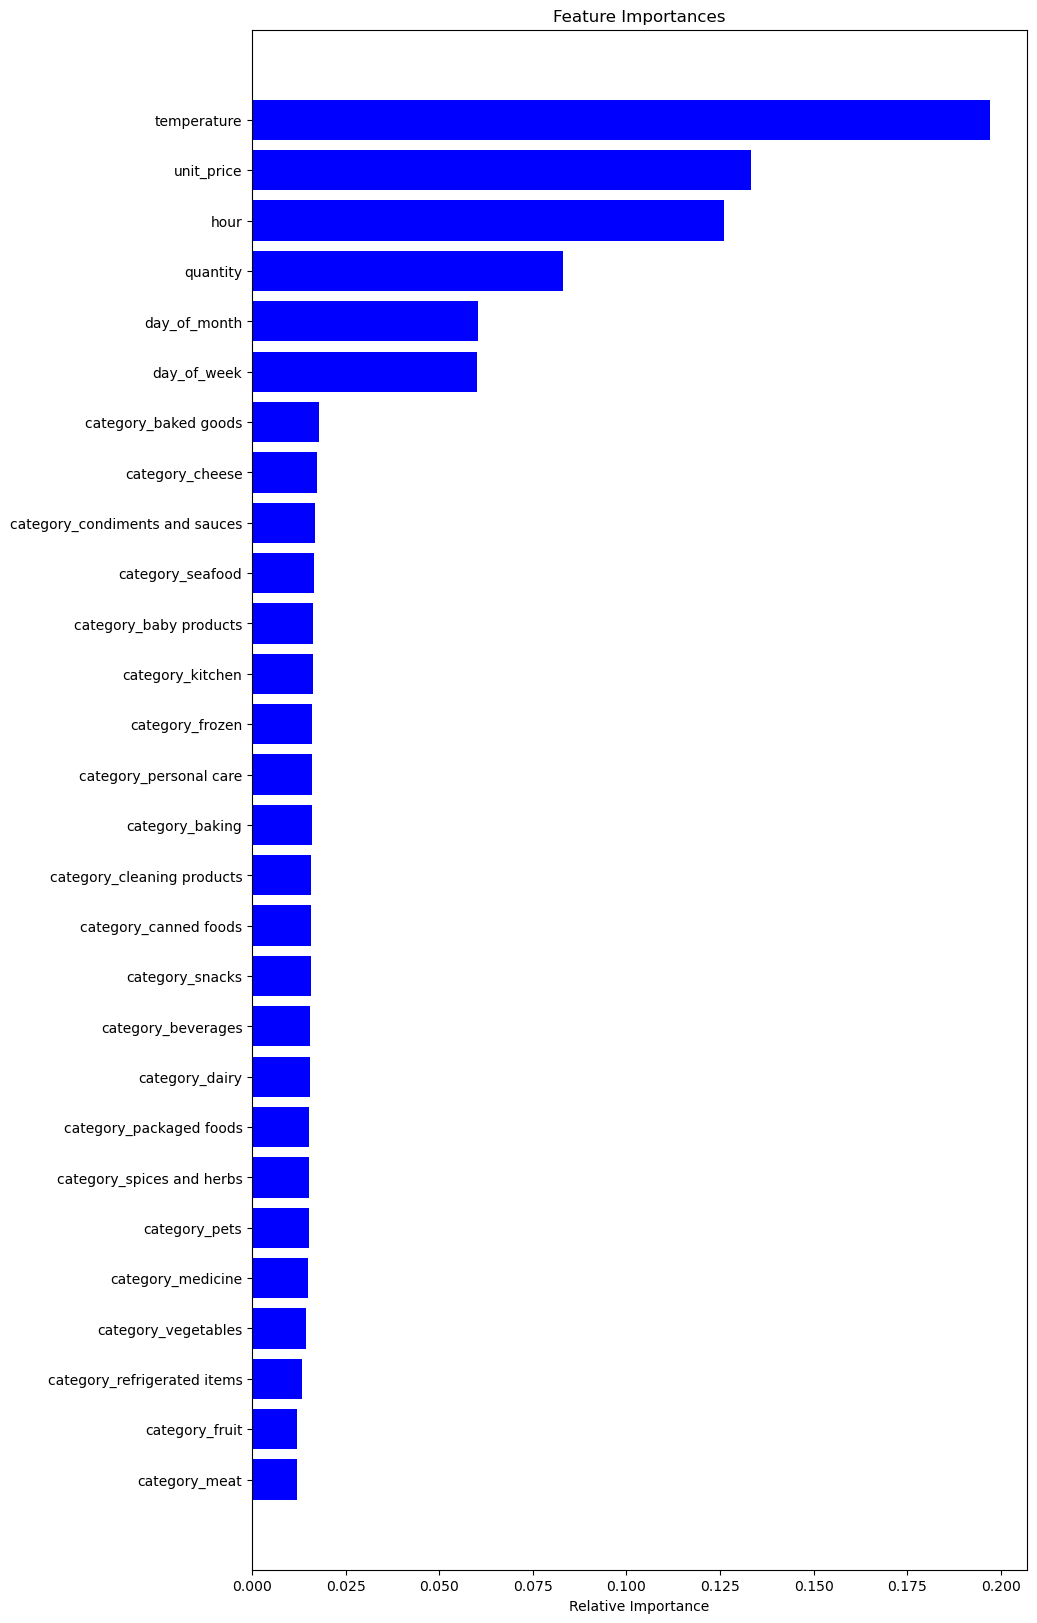

In [140]:
features = [i.split("__")[0] for i in X.columns]
importances = rand_forests[-1].feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(10, 20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This feature importance visualisation tells us:

- The product categories were not that important
- The unit price and temperature were important in predicting stock
- The hour of day was also important for predicting stock